## day 3


Matplotlib is building the font cache; this may take a moment.


       Date  Price
0  1/4/2021    269
1  1/5/2021    271
2  1/6/2021    263
3  1/7/2021    269
4  1/8/2021    268
Date     object
Price     int64
dtype: object


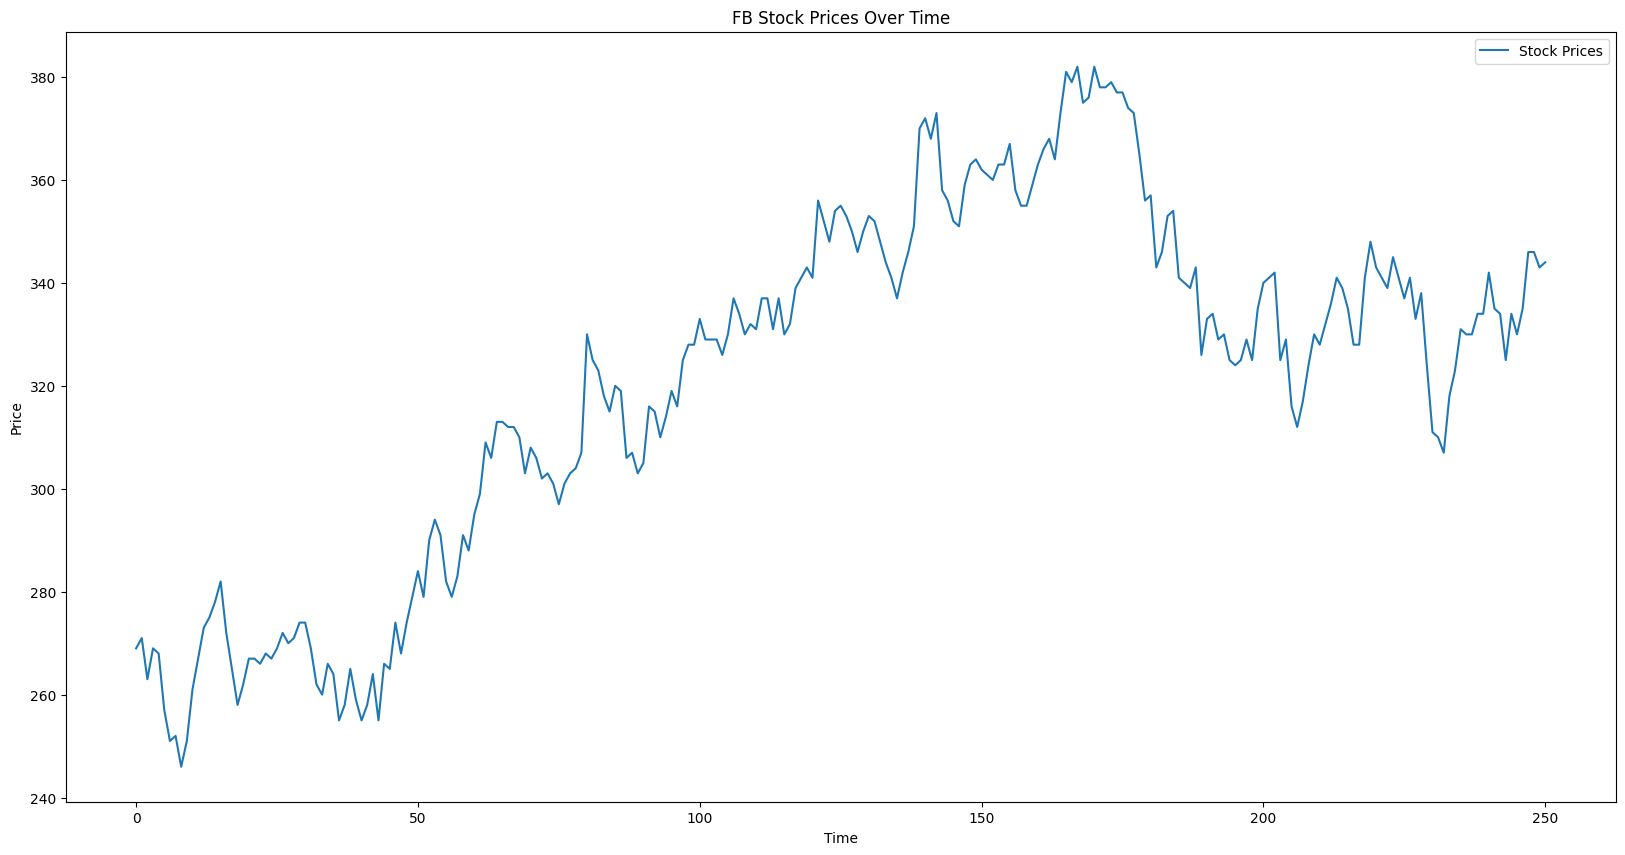

Total number of rows in the dataset: Date     251
Price    251
dtype: int64
Scaled Prices:
 [[-1.49673154]
 [-1.4393189 ]
 [-1.66896946]
 [-1.49673154]
 [-1.52543786]
 [-1.84120738]
 [-2.01344531]
 [-1.98473899]
 [-2.15697691]
 [-2.01344531]
 [-1.7263821 ]
 [-1.55414418]
 [-1.38190626]
 [-1.32449362]
 [-1.23837465]
 [-1.12354937]
 [-1.41061258]
 [-1.61155682]
 [-1.81250106]
 [-1.69767578]
 [-1.55414418]
 [-1.55414418]
 [-1.5828505 ]
 [-1.52543786]
 [-1.55414418]
 [-1.49673154]
 [-1.41061258]
 [-1.46802522]
 [-1.4393189 ]
 [-1.35319994]
 [-1.35319994]
 [-1.49673154]
 [-1.69767578]
 [-1.75508842]
 [-1.5828505 ]
 [-1.64026314]
 [-1.89862003]
 [-1.81250106]
 [-1.61155682]
 [-1.78379474]
 [-1.89862003]
 [-1.81250106]
 [-1.64026314]
 [-1.89862003]
 [-1.5828505 ]
 [-1.61155682]
 [-1.35319994]
 [-1.52543786]
 [-1.35319994]
 [-1.20966833]
 [-1.06613673]
 [-1.20966833]
 [-0.89389881]
 [-0.77907353]
 [-0.86519249]
 [-1.12354937]
 [-1.20966833]
 [-1.09484305]
 [-0.86519249]
 [-0.95131145]
 [-0.750

c:\Users\Kavinprasath\Desktop\ramana\intern_CDW\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4706
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1905
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1479
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1347
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.2397
Test Loss: 0.2396806925535202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


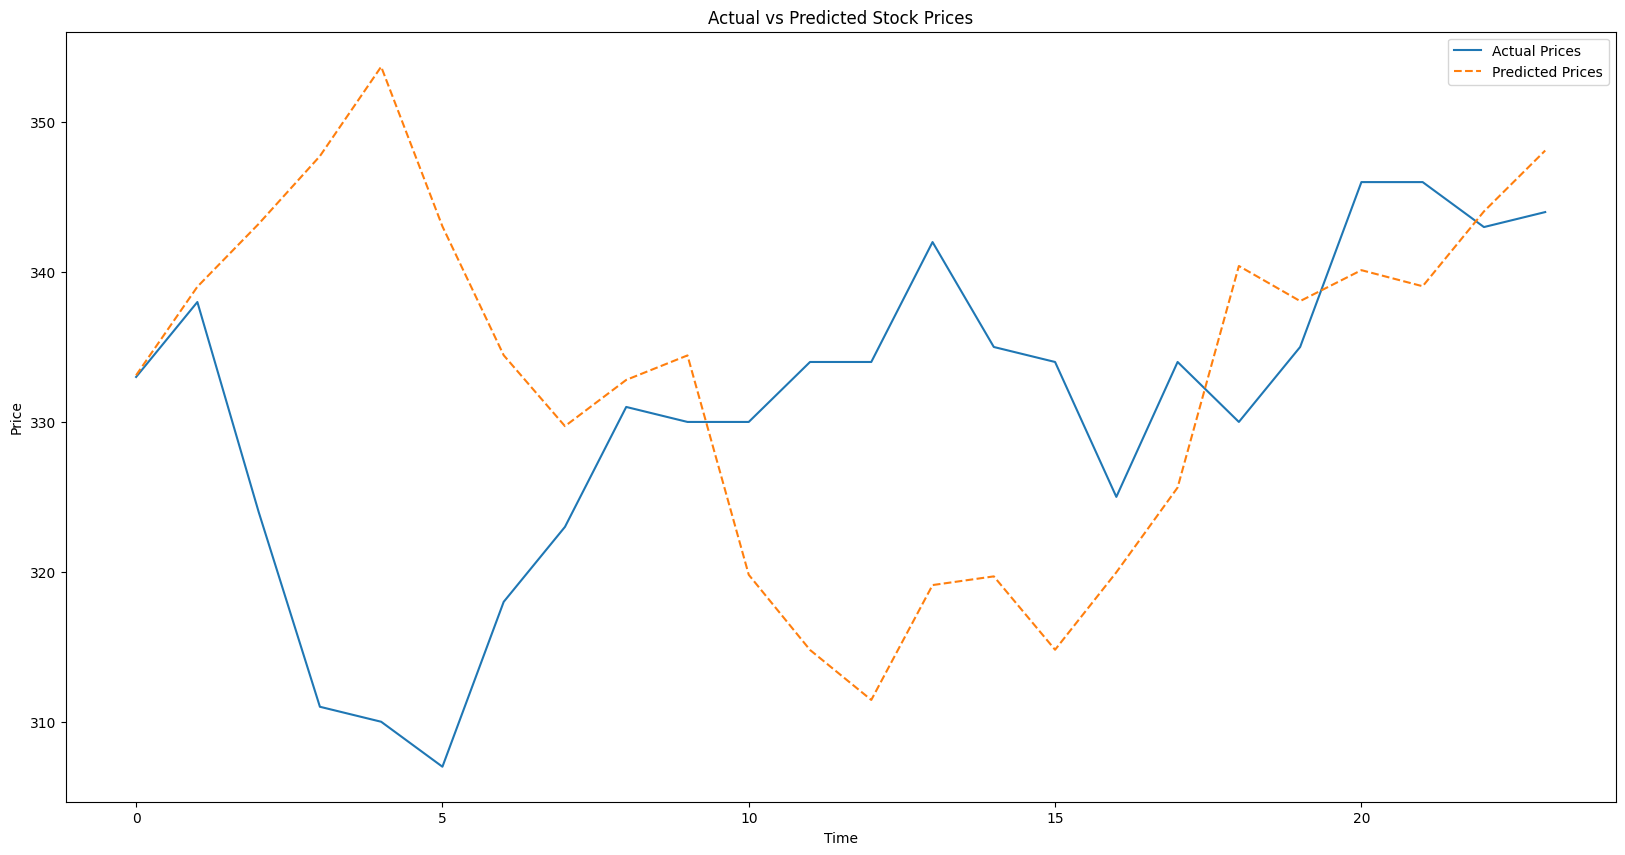

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted future stock price: 324.3036804199219


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Load dataset
file_path = './fb-stock-prices.csv'
prices = pd.read_csv(file_path)

# Display dataset details
print(prices.head())
print(prices.dtypes)

# Plot the stock prices
plt.figure(figsize=(20, 10))
plt.plot(prices['Price'], label='Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('FB Stock Prices Over Time')
plt.legend()
plt.show()

# Count the number of entries
print(f"Total number of rows in the dataset: {prices.count()}")

# Data Preprocessing
scaler = StandardScaler()  # Initialize StandardScaler
scaled_prices = scaler.fit_transform(prices[['Price']].values)  # Scale prices
print("Scaled Prices:\n", scaled_prices)

# Split data into training and testing sets
total_size = len(scaled_prices)
test_size = 50
train_size = total_size - test_size

print(f"Total size: {total_size}, Train size: {train_size}, Test size: {test_size}")

training_prices = scaled_prices[:train_size]
test_prices = scaled_prices[train_size:]

# Prepare RNN-compatible datasets
def create_rnn_dataset(data, look_back=1):
    data_x, data_y = [], []
    for i in range(len(data) - look_back - 1):
        b = data[i:(i + look_back), 0]
        data_x.append(b)
        data_y.append(data[i + look_back, 0])
    return np.array(data_x), np.array(data_y)

# Define look-back period
lookback = 25
train_req_x, train_req_y = create_rnn_dataset(training_prices, lookback)
test_req_x, test_req_y = create_rnn_dataset(test_prices, lookback)

# Reshape the data to be compatible with RNN input
train_req_x = np.reshape(train_req_x, (train_req_x.shape[0], 1, train_req_x.shape[1]))
test_req_x = np.reshape(test_req_x, (test_req_x.shape[0], 1, test_req_x.shape[1]))

print(f"Training data shape: {train_req_x.shape}, Labels shape: {train_req_y.shape}")

# Build the RNN model
price_model = Sequential()
price_model.add(SimpleRNN(32, input_shape=(1, lookback)))  # RNN layer with 32 units
price_model.add(Dense(1))  # Output layer
price_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
price_model.fit(train_req_x, train_req_y, epochs=5, batch_size=5, verbose=1)

# Evaluate the model
loss = price_model.evaluate(test_req_x, test_req_y)
print(f"Test Loss: {loss}")

# Make predictions
predictions = price_model.predict(test_req_x)

# Inverse transform predictions and actual values for interpretation
scaled_test_prices = scaler.inverse_transform(test_prices[lookback + 1:])
scaled_predictions = scaler.inverse_transform(predictions)

# Plot predictions vs actual values
plt.figure(figsize=(20, 10))
plt.plot(scaled_test_prices, label='Actual Prices')
plt.plot(scaled_predictions, label='Predicted Prices', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# Example of predicting future prices
prev_prices = np.array([324, 356, 456, 321, 324, 345, 330, 331, 335, 326,
                        345, 330, 333, 354, 356, 349, 330, 331, 335, 326,
                        356, 331, 335, 349, 333])
scaled_prev_prices = scaler.transform(prev_prices.reshape(-1, 1))
model_input = np.reshape(scaled_prev_prices, (1, 1, lookback))
future_pred = price_model.predict(model_input)
future_price = scaler.inverse_transform(future_pred)
print(f"Predicted future stock price: {future_price[0][0]}")


## Day 3 LSTM exercise

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load dataset
file_path = './Spam-Classification.csv'
data = pd.read_csv(file_path)

# Preprocess labels
label_encoder = LabelEncoder()
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])  # 0 for ham, 1 for spam

# Tokenize SMS content
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(data['SMS'])
word_index = tokenizer.word_index

# Convert SMS to sequences
sequences = tokenizer.texts_to_sequences(data['SMS'])

# Pad sequences
max_length = 100  # Maximum length of SMS messages
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Prepare train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['CLASS'], test_size=0.3, random_state=42)

# Define LSTM model
vocab_size = len(word_index) + 1  # Total number of unique words
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
batch_size = 32
epochs = 5
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

# Display prediction results
print("Sample Predictions:")
for i in range(10):  # Display 10 sample predictions
    print(f"Message: {data['SMS'].iloc[i]}\nActual: {y_test.iloc[i]}\nPredicted: {predicted_classes[i][0]}\n")


c:\Users\Kavinprasath\Desktop\ramana\intern_CDW\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5082 - loss: 0.6934 - val_accuracy: 0.4889 - val_loss: 0.6932
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4687 - loss: 0.6942 - val_accuracy: 0.4889 - val_loss: 0.6942
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5126 - loss: 0.6926 - val_accuracy: 0.4889 - val_loss: 0.6935
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5144 - loss: 0.6929 - val_accuracy: 0.4889 - val_loss: 0.6937
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5253 - loss: 0.6927 - val_accuracy: 0.4889 - val_loss: 0.6934
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4644 - loss: 0.6938
Test Loss: 0.6933643817901611
Test Accuracy: 0.4888888895511627
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Sample Predictions:
Message:  said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day! 
Actual: 1
Predicted: 0

Messa